Question 1: 

In [38]:
import pandas as pd 
pingees = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
pingees.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


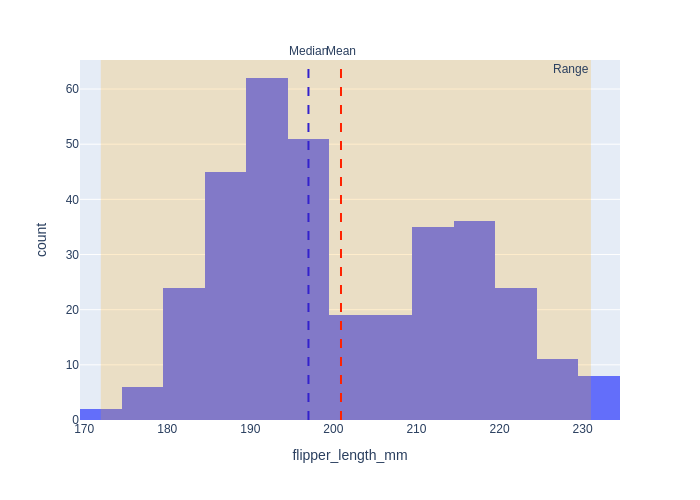

In [48]:
import plotly.express as px
import pandas as pd 
pingees = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
fig = px.histogram(pingees, x="flipper_length_mm")
fig.add_vline(x=200.915205, line_color="red", line_dash="dash", 
               annotation_text="Mean", annotation_position="top", 
               name="Mean")
fig.add_vline(x = 197.000000, line_color="blue", line_dash="dash", 
               annotation_text="Median", annotation_position="top", 
               name="Median")
fig.add_vrect(x0=172.000000, x1=231.000000, fillcolor="orange", 
               opacity=0.2, line_width=0, annotation_text="Range")
fig.show(renderer="png")

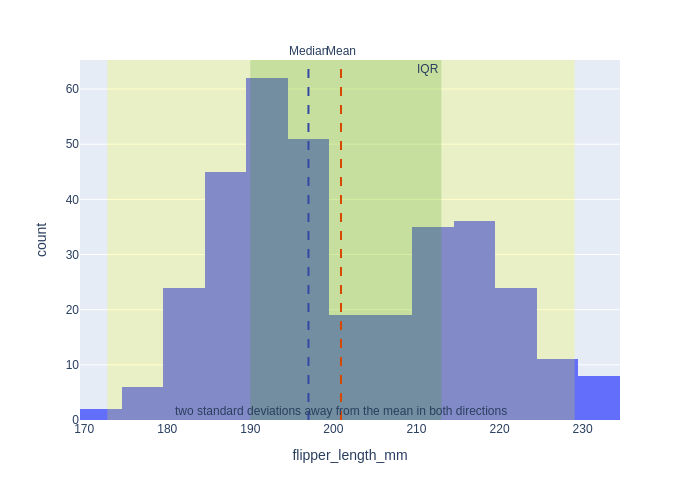

In [55]:
import plotly.express as px
import pandas as pd 
pingees = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
fig = px.histogram(pingees, x="flipper_length_mm")
fig.add_vline(x=200.915205, line_color="red", line_dash="dash", 
               annotation_text="Mean", annotation_position="top", 
               name="Mean")
fig.add_vline(x = 197.000000, line_color="blue", line_dash="dash", 
               annotation_text="Median", annotation_position="top", 
               name="Median")
fig.add_vrect(x0=190.000000, x1=213.000000, fillcolor="green", 
               opacity=0.2, line_width=0, annotation_text="IQR")
fig.add_vrect(x0=200.915205-2*14.061714, x1=200.915205+2*14.061714, fillcolor="yellow", 
               opacity=0.2, line_width=0, annotation_text="two standard deviations away from the mean in both directions", annotation_position="bottom")
fig.show(renderer="png")

Question 2: 

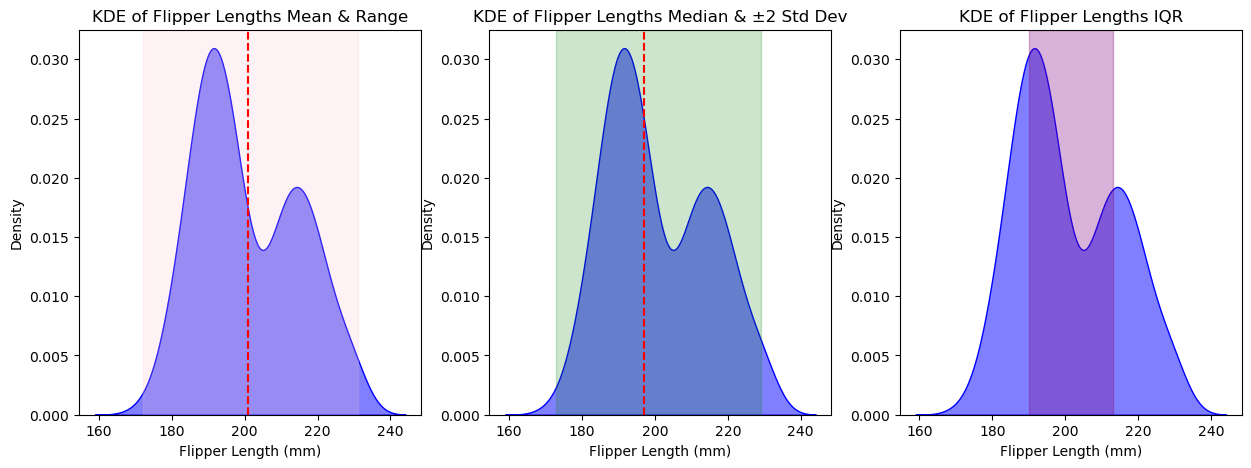

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Rectangle
pingees = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.kdeplot(data=pingees, x='flipper_length_mm', ax=axes[0], fill=True, color='blue', alpha=0.5)
axes[0].set_title('KDE of Flipper Lengths Mean & Range')
axes[0].set_xlabel('Flipper Length (mm)')
axes[0].set_ylabel('Density')
axes[0].axhspan(0, 0.02, xmin=195, xmax=210, color='gray', alpha=0.3)
axes[0].axvline(200.915205, color='red', linestyle='--', label='Mean')
axes[0].axvspan(172.000000, 231.000000, color='pink', alpha=0.2, label='Range')


sns.kdeplot(data=pingees, x='flipper_length_mm', ax=axes[1], fill=True, color='blue', alpha=0.5)
axes[1].set_title('KDE of Flipper Lengths Median & ±2 Std Dev')
axes[1].set_xlabel('Flipper Length (mm)')
axes[1].set_ylabel('Density')
axes[1].axhspan(0, 0.02, xmin=195, xmax=210, color='gray', alpha=0.3)
axes[1].axvline(197.000000, color='red', linestyle='--', label='Median')
axes[1].axvspan(200.915205-2*14.061714, 200.915205+2*14.061714, color='green', alpha=0.2, label='±2 Std Dev')

sns.kdeplot(data=pingees, x='flipper_length_mm', ax=axes[2], fill=True, color='blue', alpha=0.5)
axes[2].set_title('KDE of Flipper Lengths IQR')
axes[2].set_xlabel('Flipper Length (mm)')
axes[2].set_ylabel('Density')
axes[2].axvspan(190.000000, 213.000000, color='purple', alpha=0.3, label='IQR')


Question 3: I would prefer to use the KDE. For the box plot, even though the key statistical values are listed, how the data is distributed is not shown, so I would not choose this method. I would prefer a KDE over a histogram because the representation of data in a KDE is more smooth than in a histogram. Also, a KDE does not require choosing a bandwidth, and we can see the data across all values. I think the smooth curve of a KDE and how we can see the distribution of data through all the values is something that I really like, and that is why I prefer the KDE over the box plot and histogram.

https://chatgpt.com/share/66f0e026-0d38-8001-be39-a679c6501426

Question 4:

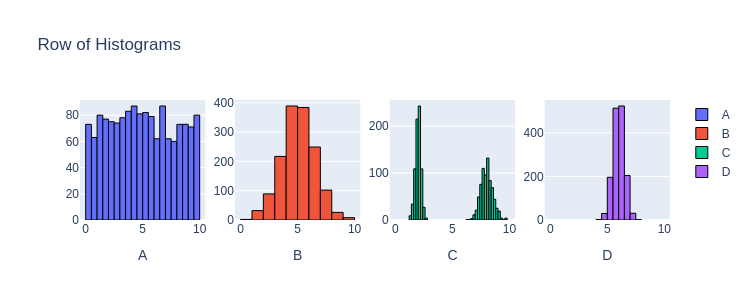

In [1]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

1. Which datasets have similar means and similar variances：
A and C

2. Which datasets have similar means but quite different variances：
A and B

3. Which datasets have similar variances but quite different means：
None, A and C are the only two that has the similar variance, but they also have similar means

4. Which datasets have quite different means and quite different variances：
C and D


Question 5: 

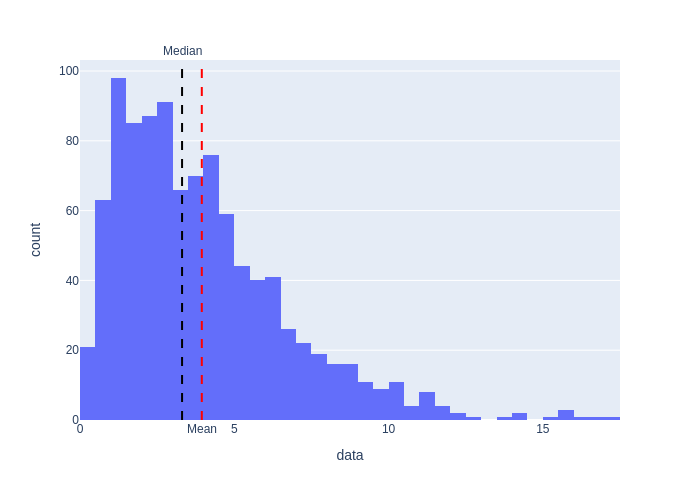

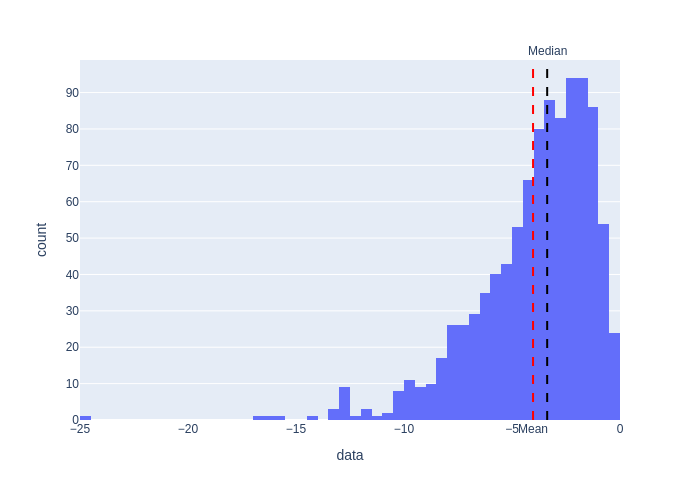

In [54]:
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")

fig1.add_vline(x = 3.30784569, line_color="black", line_dash="dash", 
               annotation_text="Median", annotation_position="top", 
               name="Median")

fig1.add_vline(x = 3.947321006254626, line_color="red", line_dash="dash", 
               annotation_text="Mean", annotation_position="bottom", 
               name="Mean")

fig1.show(renderer="png")


sample1.mean()
np.quantile(sample1, [0.5]) # median


sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data")

fig2.add_vline(x = -3.37126768, line_color="black", line_dash="dash", 
               annotation_text="Median", annotation_position="top", 
               name="Median")

fig2.add_vline(x = -4.025263548888146, line_color="red", line_dash="dash", 
               annotation_text="Mean", annotation_position="bottom", 
               name="Mean")

fig2.show(renderer="png")

A right-skewed ditribution is when the tail of the graph is on the right side, in this case, the mean would be pulled towards the right side(which has a larger value) and and the mean of a right-skewed ditribution would be greater than the median. For a left-skewed distribution, the tail is on the left side and the mean would be pulled towards the left side(which has a smaller value) by the extreme values, therefore the mean would be smaller than the median. This is becasue the extreme values affect the mean more than the median.

https://chatgpt.com/share/66f1b45b-6b64-8001-b412-e434864019eb


Question 6: 

In [79]:
import pandas as pd 
superheros = pd.read_csv('https://raw.githubusercontent.com/steview-d/superhero-dashboard/master/static/data/superheroData.csv')
superheros.describe()

,Intelligence,Strength,Speed,Durability,Power,Combat,Total Power
count,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000
mean,75.632571,42.415882,41.063257,55.713324,60.969044,57.489906,358.156124
std,27.617738,34.366396,27.479716,33.277238,34.257671,29.130334,107.582626
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105.000000
25%,75.000000,10.000000,25.000000,30.000000,35.000000,40.000000,260.000000
50%,85.000000,35.000000,35.000000,60.000000,65.000000,65.000000,350.000000
75%,90.000000,75.000000,60.000000,85.000000,95.000000,80.000000,440.000000
max,100.000000,100.000000,100.000000,100.000000,240.000000,105.000000,600.000000


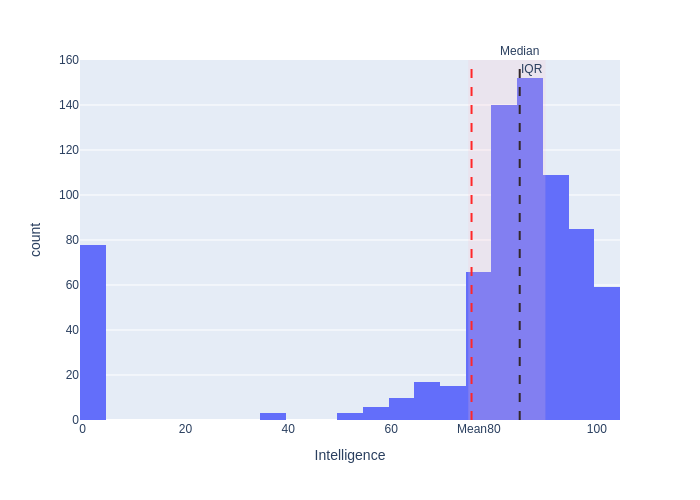

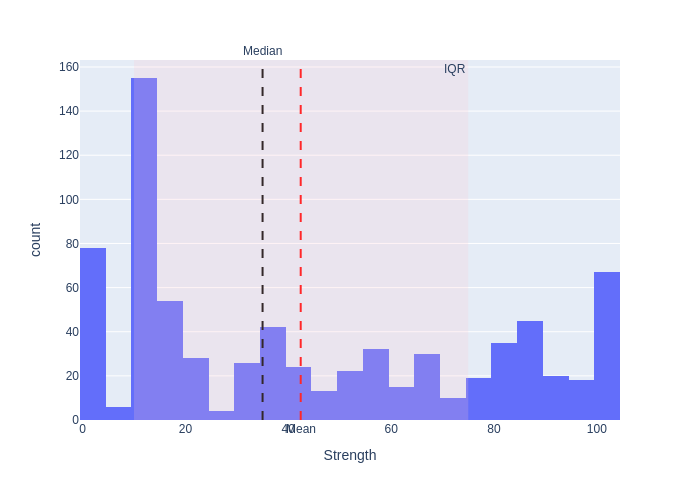

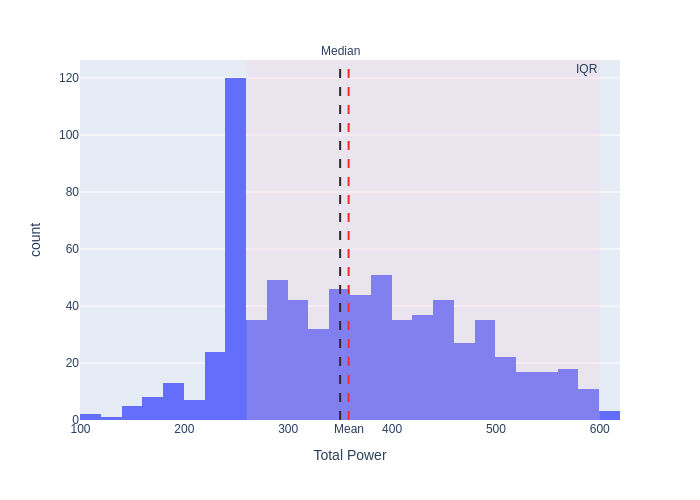

In [131]:
import plotly.express as px
import pandas as pd 

superheros = pd.read_csv('https://raw.githubusercontent.com/steview-d/superhero-dashboard/master/static/data/superheroData.csv')
fig = px.histogram(superheros, x="Intelligence")

fig.add_vline(x = 85.000000, line_color="black", line_dash="dash", 
               annotation_text="Median", annotation_position="top", 
               name="Median")

fig.add_vline(x = 75.632571, line_color="red", line_dash="dash", 
               annotation_text="Mean", annotation_position="bottom", 
               name="Mean")

fig.add_vrect(x0=75.000000, x1=90.000000, fillcolor="pink", 
               opacity=0.2, line_width=0, annotation_text="IQR")

fig.show(renderer="png")


import plotly.express as px
import pandas as pd 
superheros = pd.read_csv('https://raw.githubusercontent.com/steview-d/superhero-dashboard/master/static/data/superheroData.csv')
fig = px.histogram(superheros, x="Strength")

fig.add_vline(x = 35.000000, line_color="black", line_dash="dash", 
               annotation_text="Median", annotation_position="top", 
               name="Median")

fig.add_vline(x = 42.415882, line_color="red", line_dash="dash", 
               annotation_text="Mean", annotation_position="bottom", 
               name="Mean")

fig.add_vrect(x0=10.000000, x1=75.000000, fillcolor="pink", 
               opacity=0.2, line_width=0, annotation_text="IQR")

fig.show(renderer="png")


import plotly.express as px
import pandas as pd 
superheros = pd.read_csv('https://raw.githubusercontent.com/steview-d/superhero-dashboard/master/static/data/superheroData.csv')
fig = px.histogram(superheros, x="Total Power")

fig.add_vline(x = 350.000000, line_color="black", line_dash="dash", 
               annotation_text="Median", annotation_position="top", 
               name="Median")

fig.add_vline(x = 358.156124, line_color="red", line_dash="dash", 
               annotation_text="Mean", annotation_position="bottom", 
               name="Mean")

fig.add_vrect(x0=260.000000, x1=600.000000, fillcolor="pink", 
               opacity=0.2, line_width=0, annotation_text="IQR")

fig.show(renderer="png")

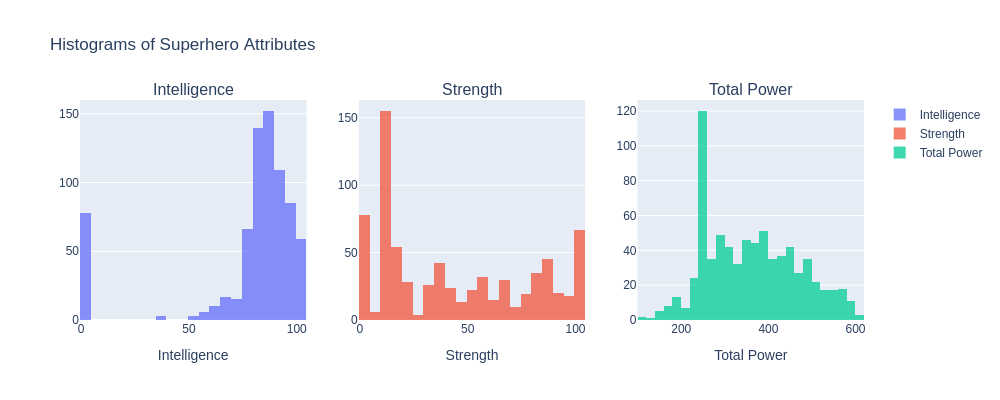

In [121]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

superheros = pd.read_csv('https://raw.githubusercontent.com/steview-d/superhero-dashboard/master/static/data/superheroData.csv')

fig = make_subplots(rows=1, cols=3, subplot_titles=("Intelligence", "Strength", "Total Power"))

fig.add_trace(go.Histogram(x=superheros['Intelligence'], name='Intelligence', opacity=0.75),row=1, col=1)
fig.add_trace(go.Histogram(x=superheros['Strength'], name='Strength', opacity=0.75),row=1, col=2)
fig.add_trace(go.Histogram(x=superheros['Total Power'], name='Total Power', opacity=0.75),row=1, col=3)

fig.update_layout(height=400, width=1000, title_text="Histograms of Superhero Attributes")
fig.update_xaxes(title_text="Intelligence", row=1, col=1)
fig.update_xaxes(title_text="Strength", row=1, col=2)
fig.update_xaxes(title_text="Total Power", row=1, col=3)

fig.show(renderer="png")

Question 7: 

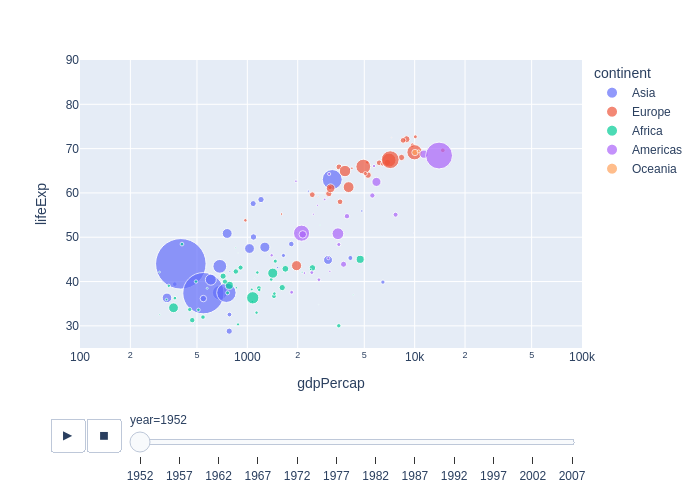

In [138]:
import plotly.express as px
df = px.data.gapminder()
fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

fig.show(renderer="png"

Question 8: 

In [ ]:
import plotly.express as px
df = px.data.gapminder()
fig = px.scatter(df, x="percent change", y="rank", animation_frame="year", animation_group="name",
           size="percent", color="sex", hover_name="name", size_max=50, range_x=[-0.005,0.005])

fig.show(renderer="png")

Question 9: Working on it